# **1. Pré-requis : Installation**

In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


# **2. Import et Initialisation de l'AutoML**

In [ ]:
from flaml import AutoML

from sklearn.datasets import load_iris

# Initialisation d'une instance autoML
automl = AutoML()


Ici, on importe notre jeu de donnée via la librairie sklearn.datasets, prenons l'exemple d'un problème de classification avec le dataset iris.

Les données d'entrainement peuvent être une array numpy ou un dataframe pandas.

Les données d'iris contiennent 3 types de fleurs, et ont des features spécifiques comme la longueur et la largeur des pétales/sépales.

# **3. Spécification des paramètres de l'AutoML**

Nous avons ici plusieurs paramètres de l'AutoML : 

Si nous spécifions aucun des paramètres, il prendra les paramètres par défaut, et prendra plus de temps pour rechercher le meilleur modèle et les hyperparamètres du modèle.
<br><br>
Le paramètre "**task**" permet de spécifier le problème de machine learning.
Il peut être regression, ts_forecast, summarization... Ici, il s'agit d'un probleme de classification.
<br><br>
Ensuite, le paramètre "**time_budget**" est optionnel, c'est un paramètre pour limiter le temps la recherche du modèle de et de ses hyperparamètres.  L'unité en seconde et pour l'exemple, nous avons spécifié 20 secondes.

Il existe un autre paramètre qui est "**max_iter**", pour limiter le maximum de modèles à essayer dans le processus d'AutoML.
<br><br>
La métrique d'optimisation est spécifiée via le paramètre "**metric**". Il peut être soit une metrique existante, soit une fonction définie par l'utilisateur. On y trouve, log_loss pour la classification multi-class, roc_auc pour la classification binaire, mse pour l'erreur quadratique moyenne... Ici, nous avons utilisé la metrique : Accuracy.
<br><br>
Les essais sont loggués dans un fichier via le paramètre "**log_file_name**": iris.log, sous la forme d'un fichier JSON.


In [ ]:
# Paramètre de l'autoML
automl_settings = {
    "task": 'classification',
    "time_budget": 20,
    "metric": 'accuracy',
    "log_file_name": "iris.log",
}

# **4. Entrainement de l'autoML**

Ici, le jeu de donnée est considéré comme un array numpy, on spécifie dans la fonction "**fit**" : les données d'entrainements X et y et les paramètres de notre AutoML.

Affichons le meilleur des modèles : 

In [ ]:
X_train, y_train = load_iris(return_X_y=True)
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-07 16:15:36] {2716} INFO - task = classification
[flaml.automl.automl: 02-07 16:15:36] {2718} INFO - Data split method: stratified
[flaml.automl.automl: 02-07 16:15:36] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-07 16:15:36] {2848} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 02-07 16:15:36] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 02-07 16:15:36] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-07 16:15:36] {3461} INFO - Estimated sufficient time budget=497s. Estimated necessary time budget=11s.
[flaml.automl.automl: 02-07 16:15:36] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.0733,	best estimator lgbm's best error=0.0733
[flaml.automl.automl: 02-07 16:15:36] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-07 16:15:36] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.automl: 02-07 16:15:56] {3508} INFO -  at 20.0s,	estimator lrl1's best error=0.0667,	best estimator lgbm's best error=0.0333
[flaml.automl.automl: 02-07 16:15:56] {3772} INFO - retrain lgbm for 0.0s
[flaml.automl.automl: 02-07 16:15:56] {3779} INFO - retrained model: LGBMClassifier(learning_rate=0.41398771112970667, max_bin=31,
               min_child_samples=9, n_estimators=4, num_leaves=4,
               reg_alpha=0.0024255899041695415, reg_lambda=1.9151305043222606,
               verbose=-1)
[flaml.automl.automl: 02-07 16:15:56] {3024} INFO - fit succeeded
[flaml.automl.automl: 02-07 16:15:56] {3025} INFO - Time taken to find the best model: 13.219608068466187


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(automl.model)

Il nous renvoie un modèle de **LGMestimator** pour ce problème de de classification.

Affichons le modèle avec les hyperparamètres avec le paramètre "**estimator**" :

In [ ]:
print(automl.model.estimator)

LGBMClassifier(learning_rate=0.41398771112970667, max_bin=31,
               min_child_samples=9, n_estimators=4, num_leaves=4,
               reg_alpha=0.0024255899041695415, reg_lambda=1.9151305043222606,
               verbose=-1)


On peut également les afficher séparement :

In [ ]:
print(automl.best_estimator)

lgbm


In [ ]:
print(automl.best_config)

{'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.41398771112970667, 'log_max_bin': 5, 'colsample_bytree': 1.0, 'reg_alpha': 0.0024255899041695415, 'reg_lambda': 1.9151305043222606}


In [ ]:
print('La meilleur Accuracy sur les données de validation : {0:.4g}'.format(1-automl.best_loss))

La meilleur Accuracy sur les données de validation : 0.9667


# **5. Prédiction des données**

Faisons une prédiction des données avec notre modèles d'AutoML :

In [ ]:
print(automl.predict_proba(X_train))

[[0.90813319 0.04706318 0.04480363]
 [0.86660532 0.06833783 0.06505685]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.86660532 0.06833783 0.06505685]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.86660532 0.06833783 0.06505685]
 [0.86660532 0.06833783 0.06505685]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04480363]
 [0.72113841 0.21985961 0.05900198]
 [0.61145089 0.31982058 0.06872852]
 [0.86660532 0.06833783 0.06505685]
 [0.90813319 0.04706318 0.04480363]
 [0.90813319 0.04706318 0.04

Enfin,

On peut également tracer la fonction loss au fil du temps. 

La fonction loss quantifie l'écart entre les prévisions du modèle et les observations réelles du jeu de donnée utilisé pendant l'entraînement.

In [ ]:
from flaml.automl.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename="iris.log", time_budget=10)

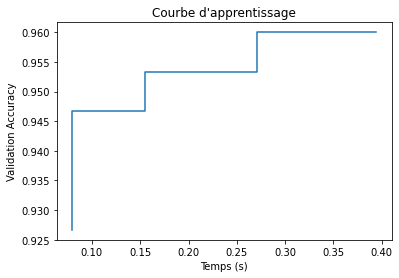

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Courbe d'apprentissage")
plt.xlabel("Temps (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history))
plt.show()

**Conclusion :**    

Flaml est une librairie facile à utiliser pour faire de l'AutoML. 

Nous avons vu qu'on pouvait facilement paramétrer notre AutoML en plaçant des conditions sur le temps de recherche du modèles et des hyperparamètres, qui dépend de la taille de notre jeu de données.

Nous avons vu comment l'AutoML nous propose facilement un modèle de machine learning avec les hyperparamètres optimisée. 

Nous avons l'accuracy de notre modèle et vérifier cela sur les données de prédictions.

Et enfin, nous avons afficher la progression d'apprentissage du modèle en fonction du temps d'apprentissage fixé dans les paramètres de l'AutoML.